In [114]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tools
import pandas as pd
import sys

In [115]:
def boundingBox(pts):
    """
    Arguments:
    ----------
    - `pts`: points of the ellipse
    Return:
    -------
    - min and max coordinates of the points to make the bounding box
    """
    
    ##Output of boundingRect = (x_min, y_min, length of box, width of box):
    rect = cv2.boundingRect(pts)

    ##Get extreme values of coordinates:
    x_min = rect[0]
    y_min = rect[1]
    x_max = rect[0] + rect[2] - 1
    y_max = rect[1] + rect[3] - 1
    
    return (x_min, y_min, x_max, y_max)

Number of ellipse(s): 3
List of the coordinates of the 2 extreme points of bounding box(s): [[1150, 344, 1279, 391], [0, 350, 105, 395], [474, 342, 787, 406]]
(x_min, y_min, x_max, y_max)


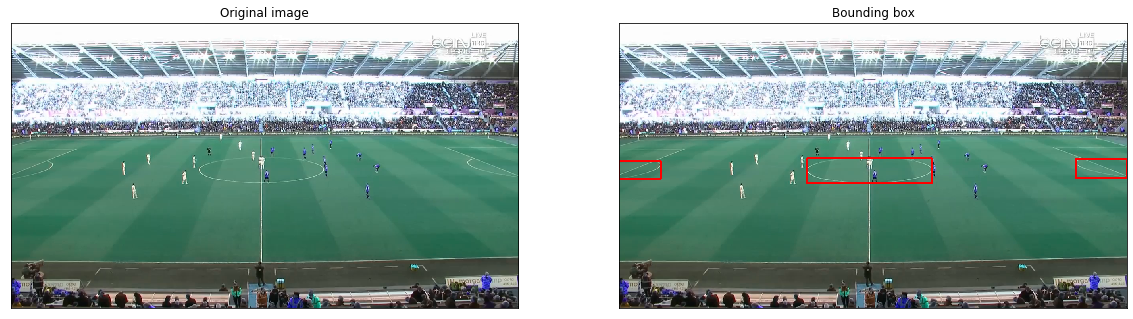

In [121]:
##Paths of image and corresponding annotation:
image_path = '../images/elps_soccer_125.png'
annotation_path = '../annotations/elps_soccer_125.txt'

##Import image and characteristics:
original_img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
height = img.shape[0]
width = img.shape[1]


##Import the coordinates of all points of the ellipse and process them:
f = open(annotation_path, "r")
lines = f.readlines()
nb_lines = np.shape(lines)
number_elps = nb_lines[0]

##List that will contain the parameters of all bounding boxes
bb_list = []


##Compute the bounding box for each ellipse
for i in range(number_elps):
    current_line = lines[i].split(",")
    nb_coord = len(current_line) 
    coord_list = []

    for i in range(nb_coord):
        coord_list.append(float(current_line[i]))

    coord_list = coord_list[: -2]
    coord_array = np.asarray(coord_list)
    points = coord_array.reshape([-1, 2])

    ##Cast coordinates to int type (will be used as coordinates):
    pts = points.astype(int)

    ##Conversion from Cytomine coordinates system to opencv coordinates system:
    for i in range(len(pts)):
        pts[i][1] = height - pts[i][1]
    
    x_min, y_min, x_max, y_max = boundingBox(pts)
    bb = []
    bb.append(x_min)
    bb.append(y_min)
    bb.append(x_max)
    bb.append(y_max)
    bb_list.append(bb)

    ##Draw bounding box on image (using 2 opposite corners of the rectangle):
    box_thickness = 3
    color = (255, 0, 0)  #red color
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, box_thickness)


print("Number of ellipse(s):", number_elps)
print("List of the coordinates of the 2 extreme points of bounding box(s):", bb_list)
print("(x_min, y_min, x_max, y_max)")
    
tools.multiPlot( 1, 2, (original_img, img),
                ( 'Original image', 'Bounding box'),
                cmap_tuple=( cm.gray, cm.gray))
#cv2.imwrite('img.png', img)
f.close()